# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* https://laurentperrinet.github.io/sciblog/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* https://laurentperrinet.github.io/sciblog/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
#from copy import deepcopy

In [3]:
from shl_scripts.shl_experiments import SHL_set
tag = 'EXP'
experiments = SHL_set({})

In [4]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 4
    n_jobs = 9
    n_jobs = 10
    n_jobs = 35

from shl_scripts.shl_experiments import SHL_set
tag = 'EXP'
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'eta_homeo', 'alpha_MP', 'eta_precision', ]
variables = ['eta', 'eta_homeo', 'alpha_homeo', 'alpha_MP']
variables = ['eta', 'eta_homeo', 'alpha_homeo', 'l0_sparseness']
variables = ['eta', 'eta_homeo', 'alpha_homeo']

list_figures = []
list_figures = ['show_dico', 'show_Pcum']
list_figures = ['show_dico', ]

display_variables = ['error', 'logL', 'perror', 'aerror', 'MI', 'cputime', 'F']
display_variables = ['error', 'qerror', 'F']


list_figures = []
list_figures = ['show_dico']
display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'qerror', 'aerror', 'MI', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']


variables = ['eta']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']
variables = ['eta', 'eta_homeo', 'eta_precision', 'alpha_MP']


if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
                    

Overwriting cache_dir/EXP.py


In [5]:
!ls -ltr {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00250_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00250_dico.pkl_lock_pid-79394_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00500_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00500_dico.pkl_lock_pid-79396_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00125_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00125_dico.pkl_lock_pid-79392_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00177_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00177_dico.pkl_lock_pid-79393_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff     0 Sep 28 15:29 cache_dir/EXP_eta=0.00707_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff    

## Homeostasis à-la-SparseNet on the activation probability

In [6]:
%run {experiments.shl.cache_dir}/{tag}.py run

[Parallel(n_jobs=35)]: Using backend LokyBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   1 tasks      | elapsed: 108.0min
[Parallel(n_jobs=35)]: Done   3 out of  36 | elapsed: 108.0min remaining: 1188.0min
[Parallel(n_jobs=35)]: Done   6 out of  36 | elapsed: 108.0min remaining: 540.1min
[Parallel(n_jobs=35)]: Done   9 out of  36 | elapsed: 108.0min remaining: 324.1min
[Parallel(n_jobs=35)]: Done  12 out of  36 | elapsed: 108.0min remaining: 216.1min
[Parallel(n_jobs=35)]: Done  15 out of  36 | elapsed: 108.0min remaining: 151.3min
[Parallel(n_jobs=35)]: Done  18 out of  36 | elapsed: 108.0min remaining: 108.0min
[Parallel(n_jobs=35)]: Done  21 out of  36 | elapsed: 108.1min remaining: 77.2min
[Parallel(n_jobs=35)]: Done  24 out of  36 | elapsed: 108.1min remaining: 54.0min
[Parallel(n_jobs=35)]: Done  27 out of  36 | elapsed: 108.1min remaining: 36.0min
[Parallel(n_jobs=35)]: Done  30 out of  36 | elapsed: 108.1min remaining: 21.6min
[Parallel(n_jobs=35)]: Done  33 o

Running variable eta with value 0.0013


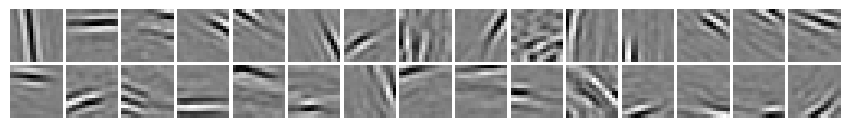

Running variable eta with value 0.0018


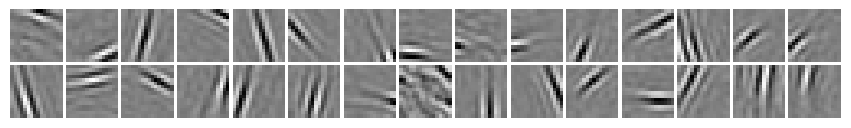

Running variable eta with value 0.0025


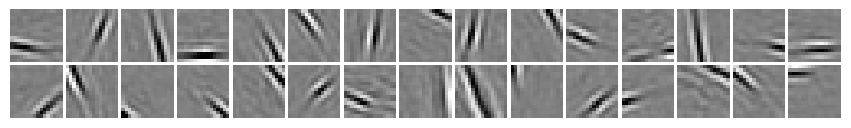

Running variable eta with value 0.0035


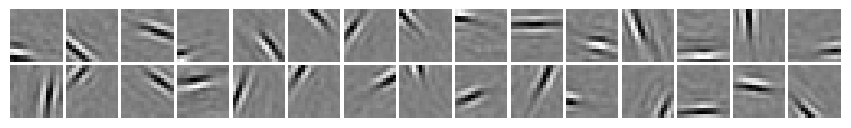

Running variable eta with value 0.0050


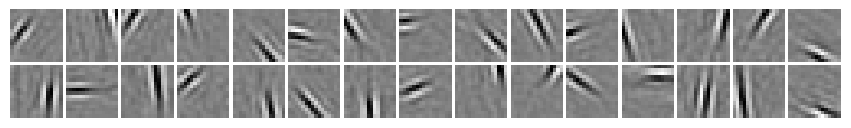

Running variable eta with value 0.0071


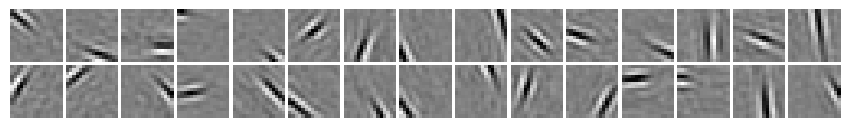

Running variable eta with value 0.0100


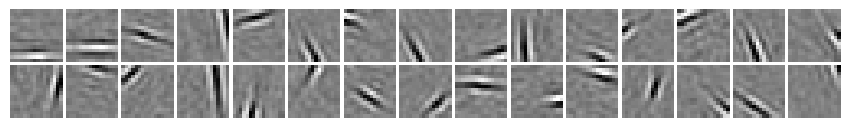

Running variable eta with value 0.0141


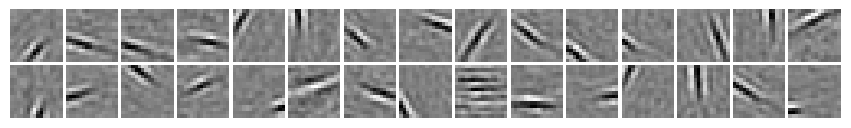

Running variable eta with value 0.0200


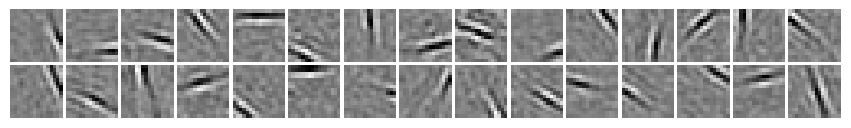

Time evolution of  error


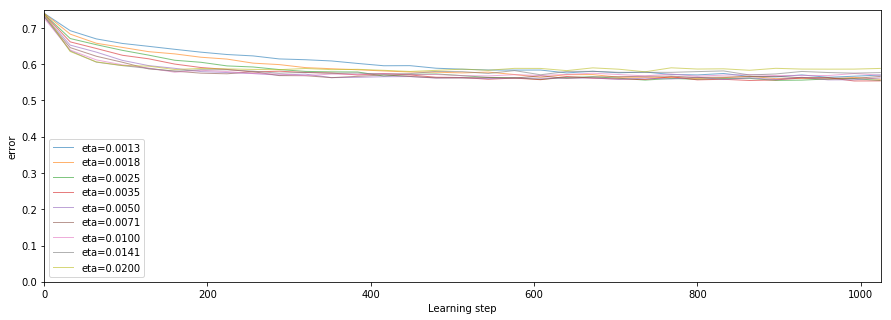

Time evolution of  logL


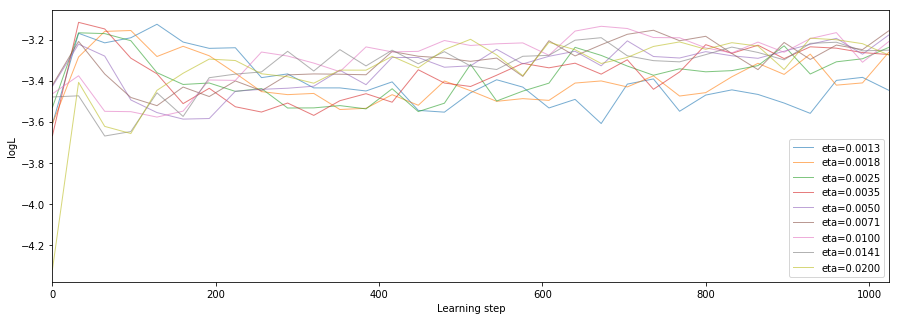

Time evolution of  perror


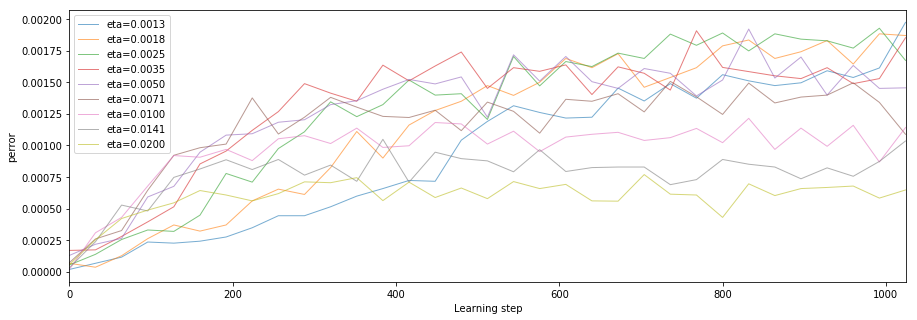

Time evolution of  MC


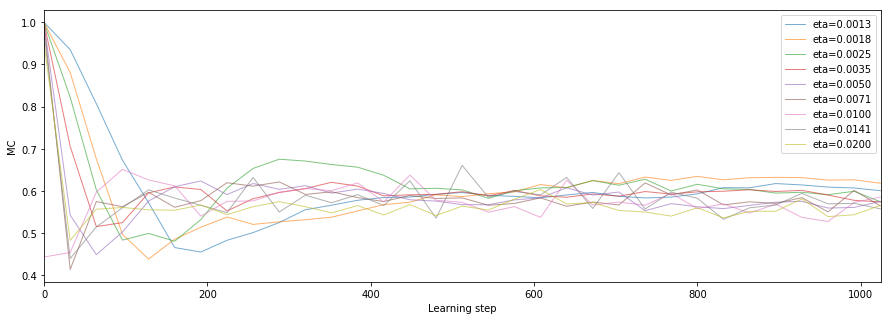

Time evolution of  cputime


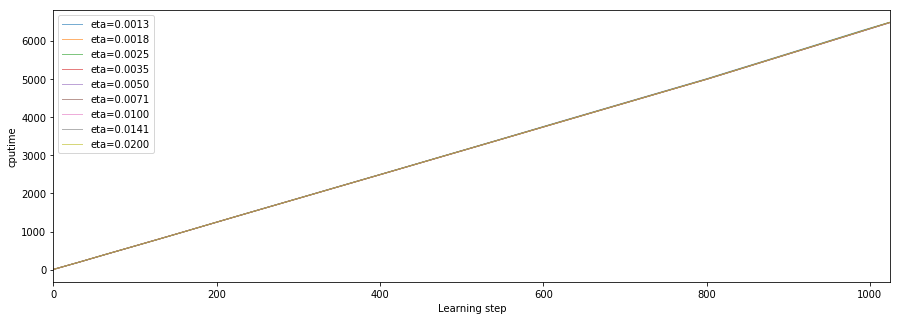

Comparison at the end of learning for  error


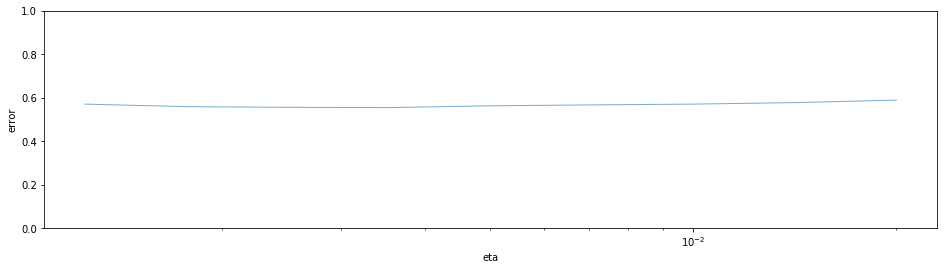

Comparison at the end of learning for  logL


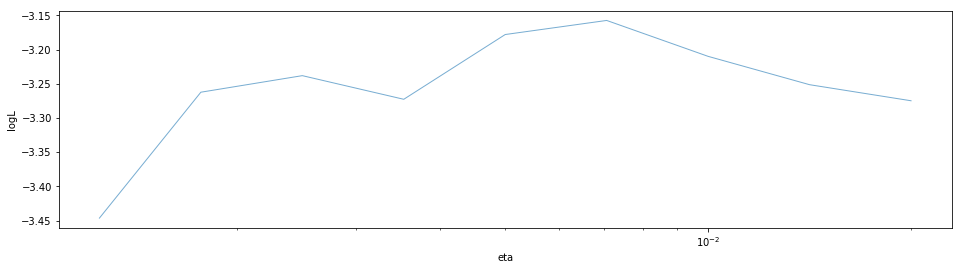

Comparison at the end of learning for  perror


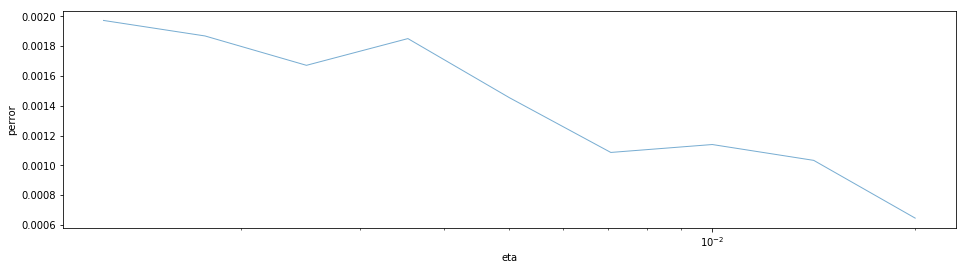

Comparison at the end of learning for  MC


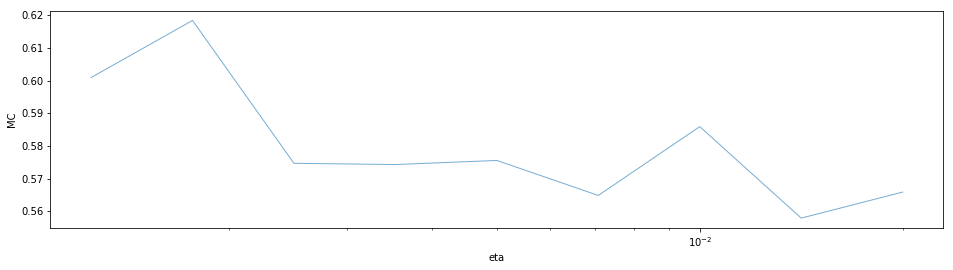

Comparison at the end of learning for  cputime


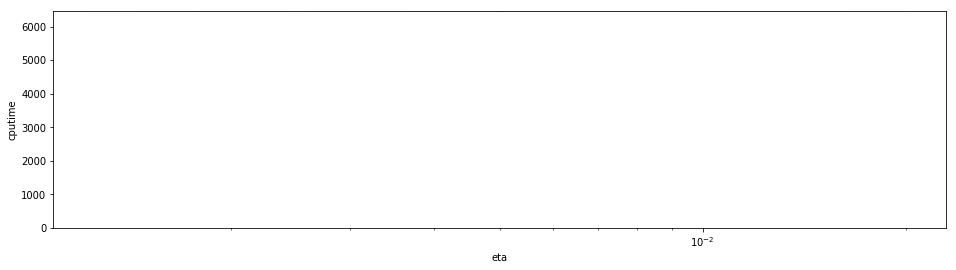

Running variable eta_homeo with value 0.0013


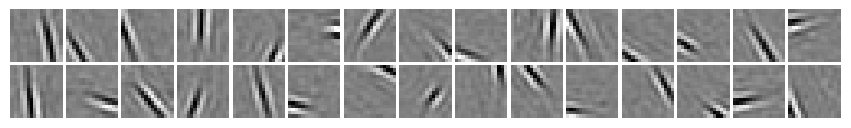

Running variable eta_homeo with value 0.0018


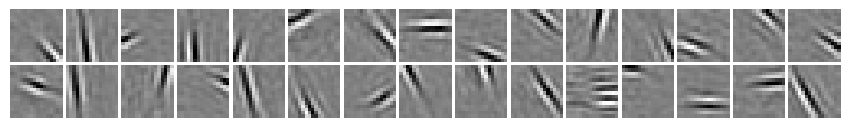

Running variable eta_homeo with value 0.0025


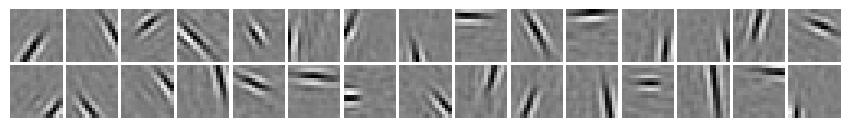

Running variable eta_homeo with value 0.0035


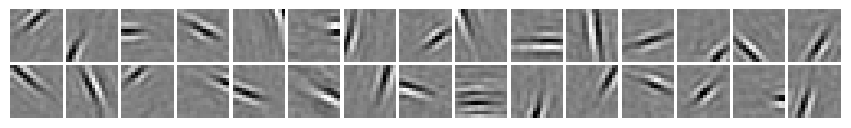

Running variable eta_homeo with value 0.0050


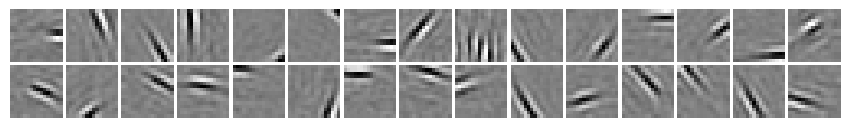

Running variable eta_homeo with value 0.0071


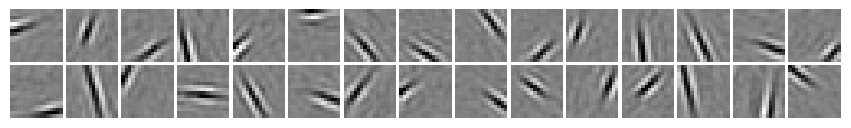

Running variable eta_homeo with value 0.0100


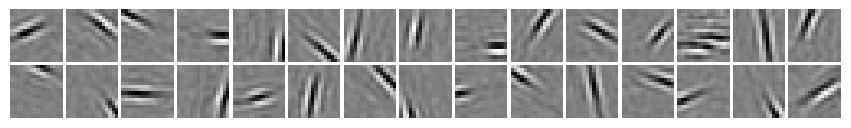

Running variable eta_homeo with value 0.0141


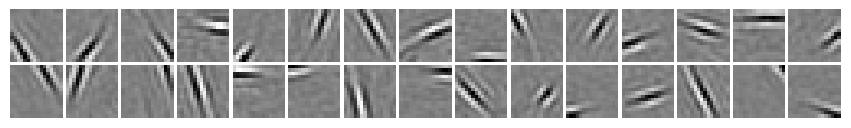

Running variable eta_homeo with value 0.0200


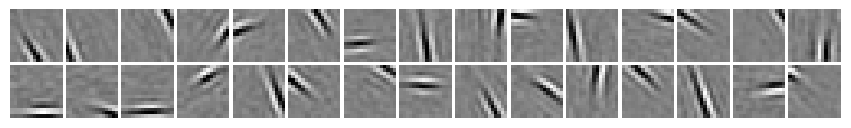

Time evolution of  error


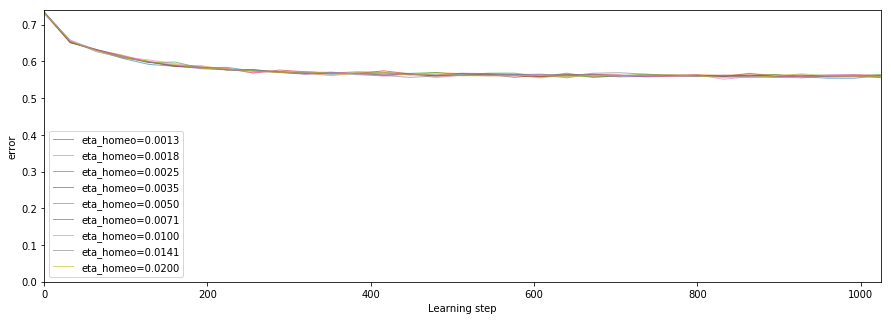

Time evolution of  logL


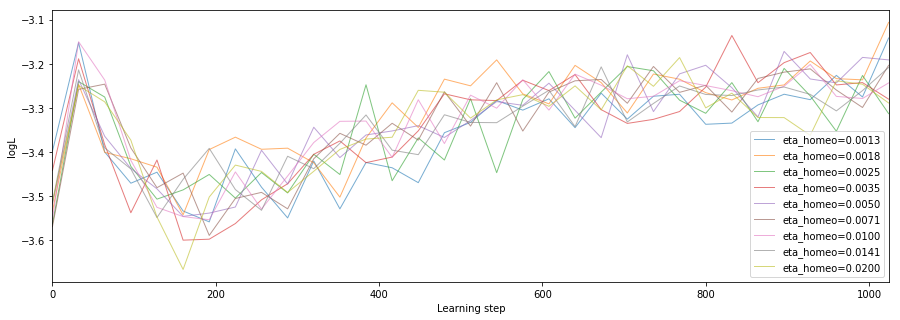

Time evolution of  perror


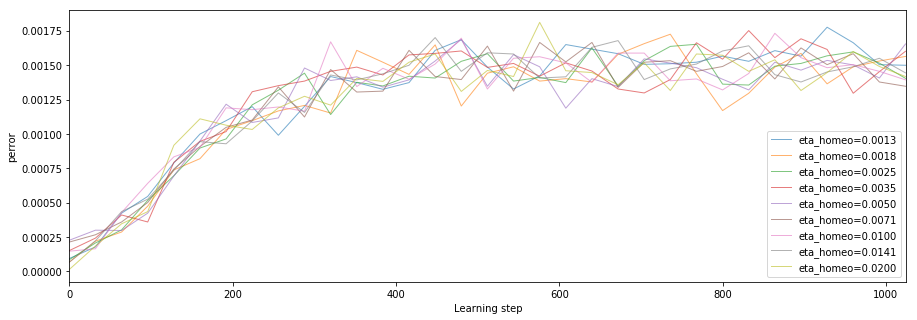

Time evolution of  MC


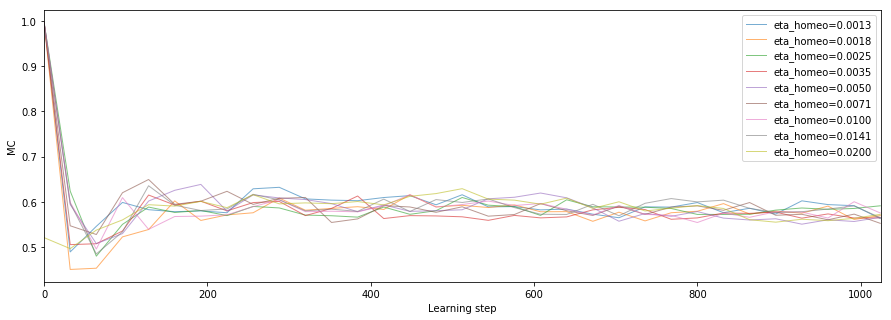

Time evolution of  cputime


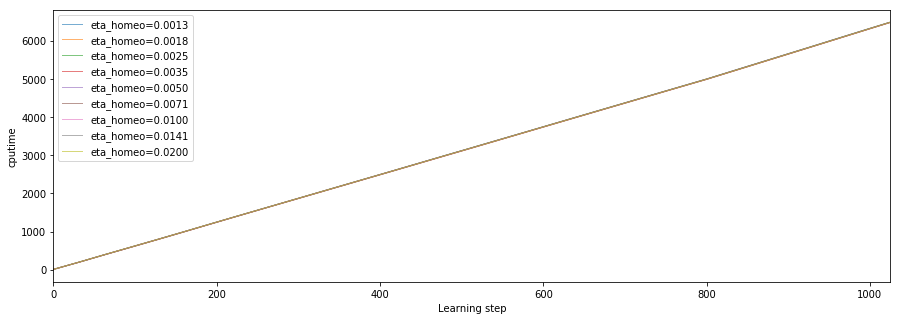

Comparison at the end of learning for  error


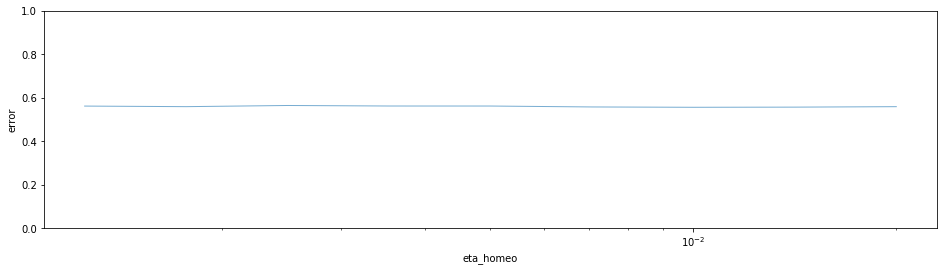

Comparison at the end of learning for  logL


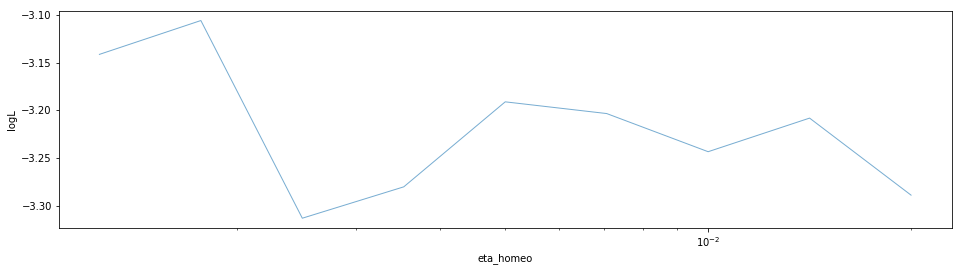

Comparison at the end of learning for  perror


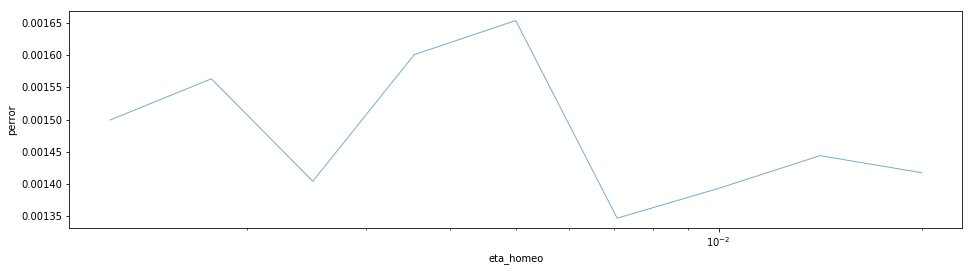

Comparison at the end of learning for  MC


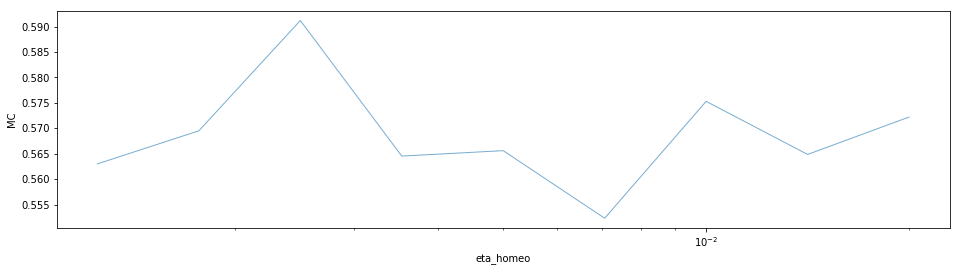

Comparison at the end of learning for  cputime


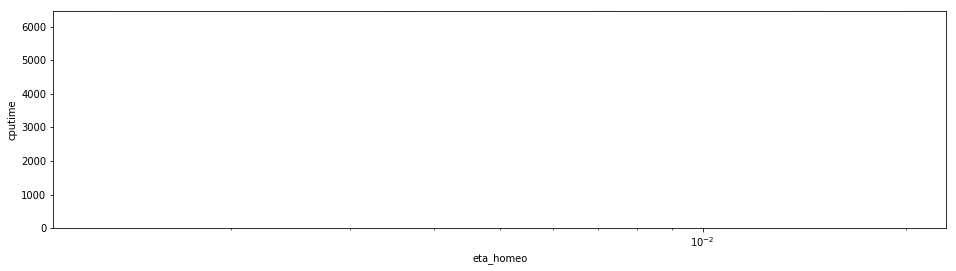

Running variable eta_precision with value 0.0001


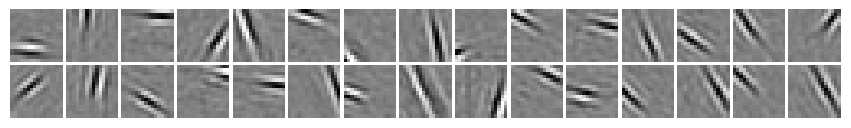

Running variable eta_precision with value 0.0002


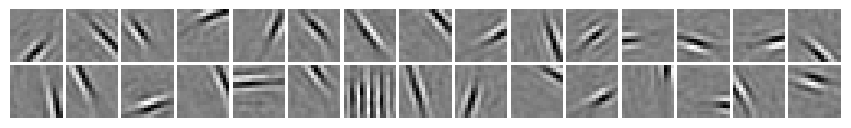

Running variable eta_precision with value 0.0003


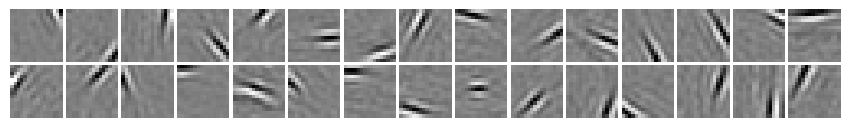

Running variable eta_precision with value 0.0004


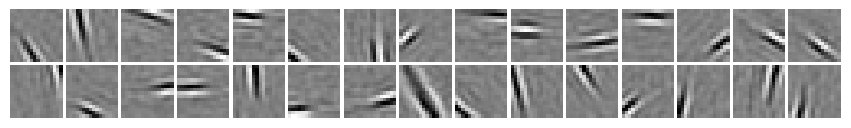

Running variable eta_precision with value 0.0005


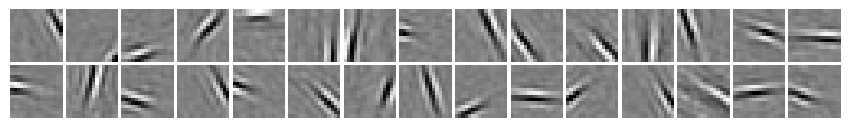

Running variable eta_precision with value 0.0007


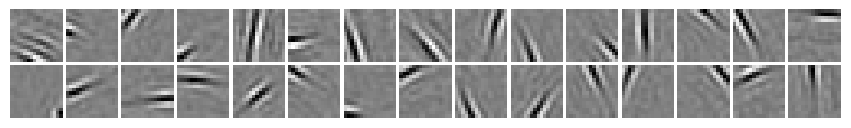

Running variable eta_precision with value 0.0010


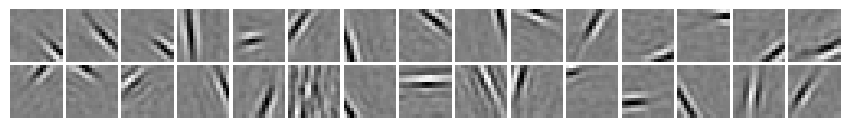

Running variable eta_precision with value 0.0014


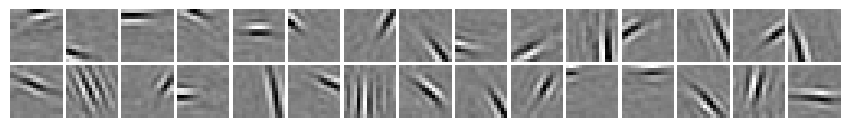

Running variable eta_precision with value 0.0020


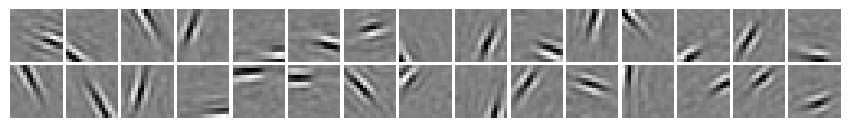

Time evolution of  error


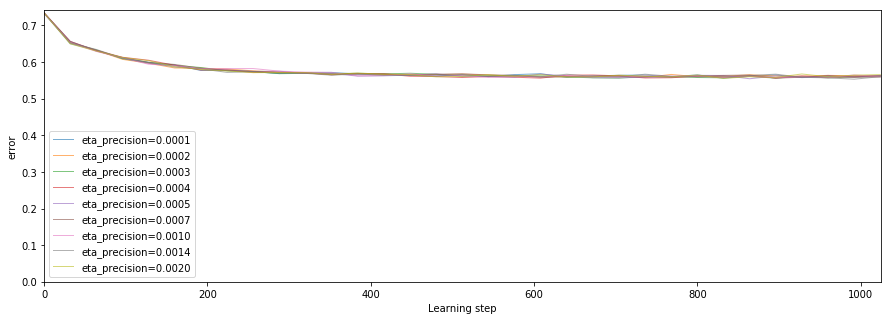

Time evolution of  logL


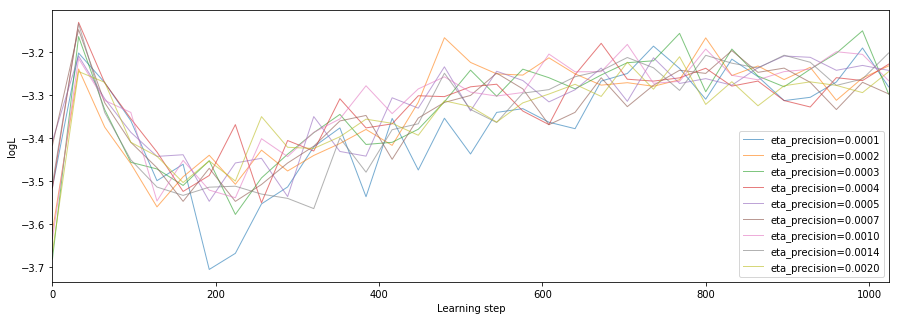

Time evolution of  perror


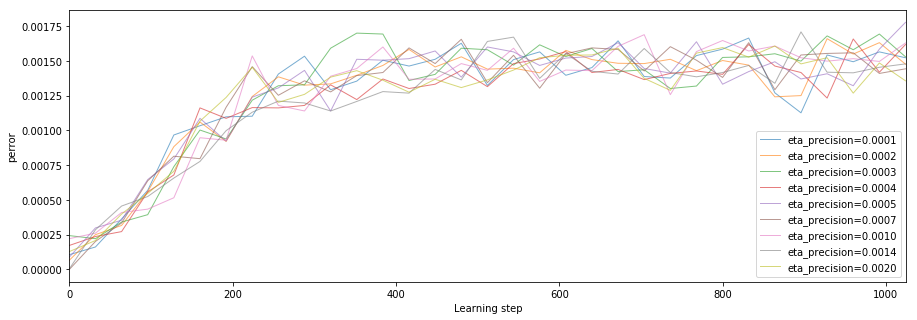

Time evolution of  MC


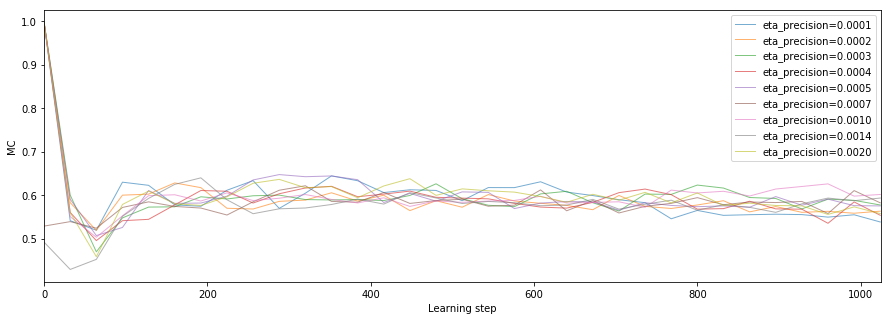

Time evolution of  cputime


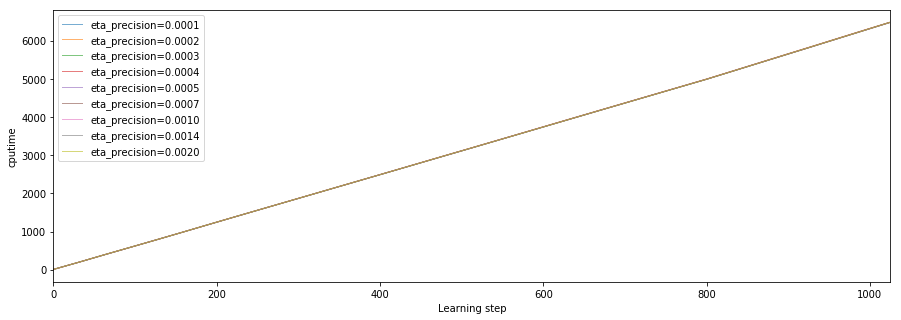

Comparison at the end of learning for  error


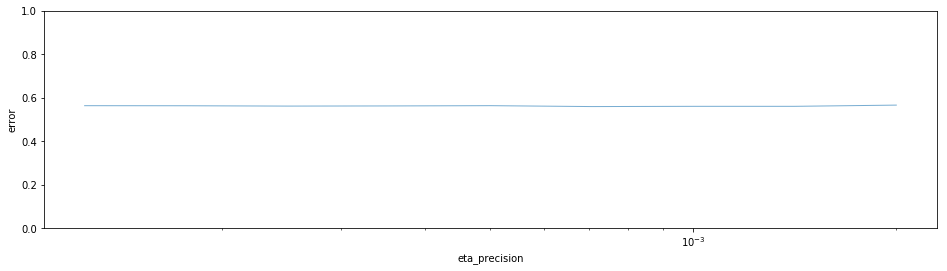

Comparison at the end of learning for  logL


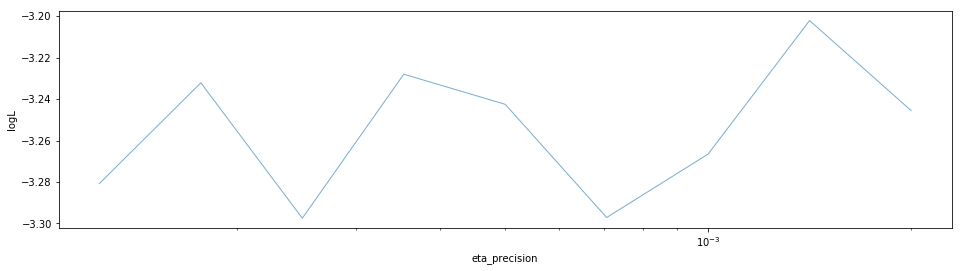

Comparison at the end of learning for  perror


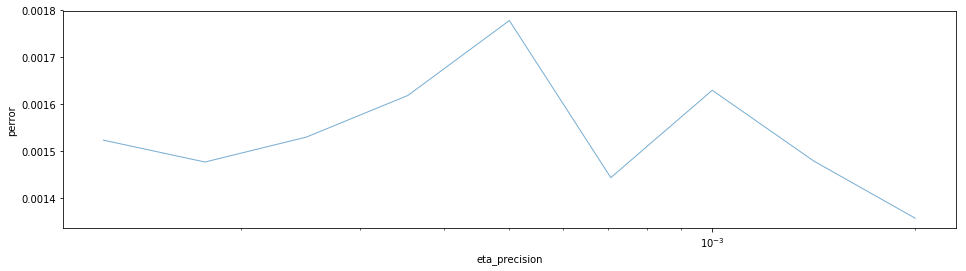

Comparison at the end of learning for  MC


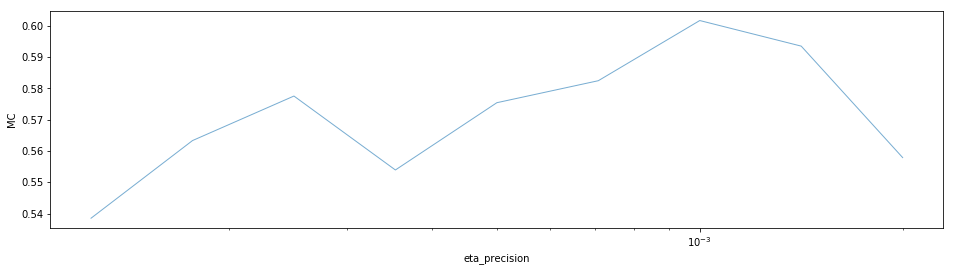

Comparison at the end of learning for  cputime


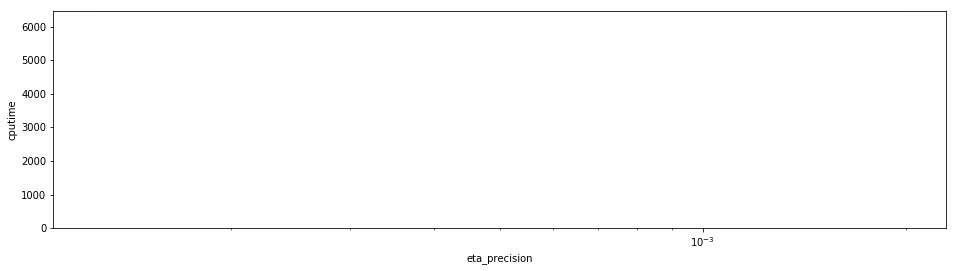

Running variable alpha_MP with value 0.2500


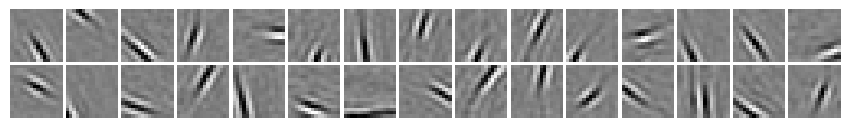

Running variable alpha_MP with value 0.2973


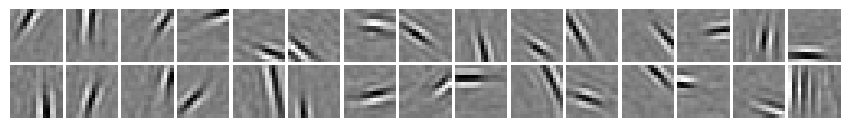

Running variable alpha_MP with value 0.3536


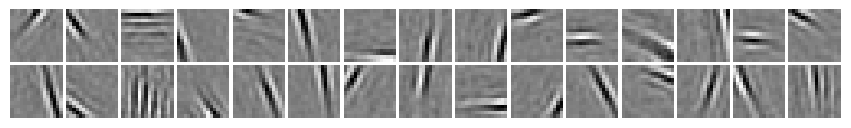

Running variable alpha_MP with value 0.4204


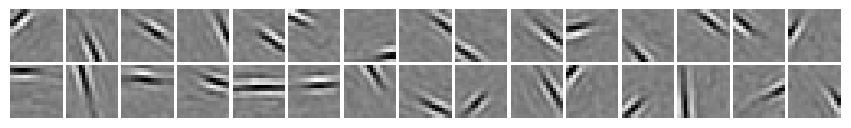

Running variable alpha_MP with value 0.5000


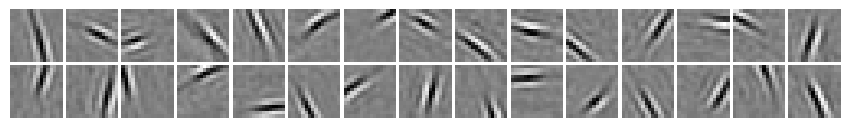

Running variable alpha_MP with value 0.5946


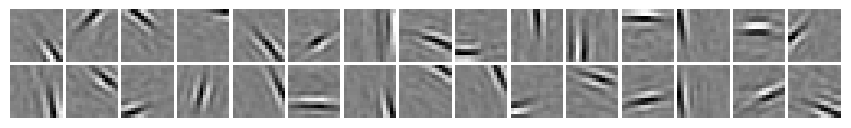

Running variable alpha_MP with value 0.7071


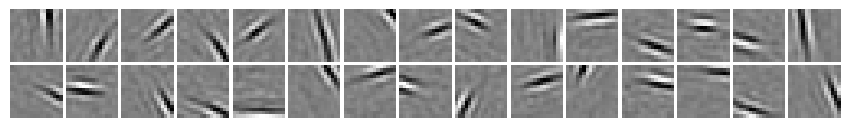

Running variable alpha_MP with value 0.8409


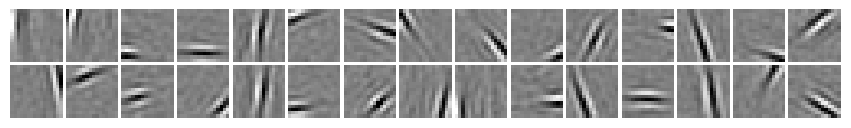

Running variable alpha_MP with value 1.0000


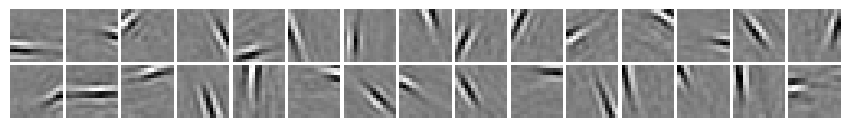

Time evolution of  error


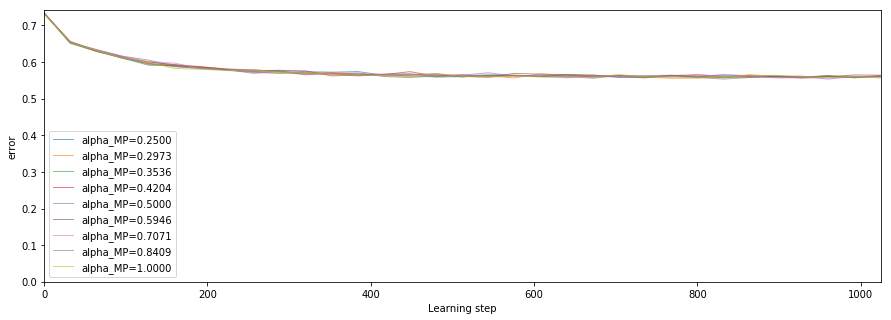

Time evolution of  logL


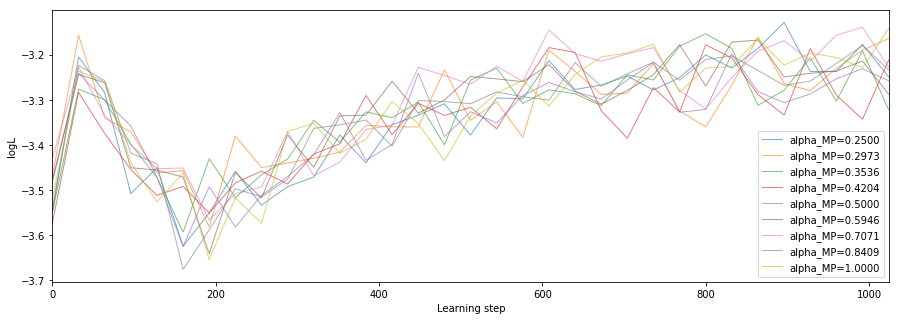

Time evolution of  perror


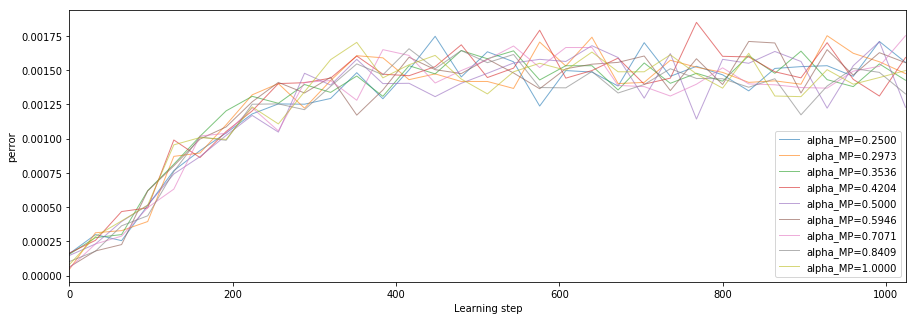

Time evolution of  MC


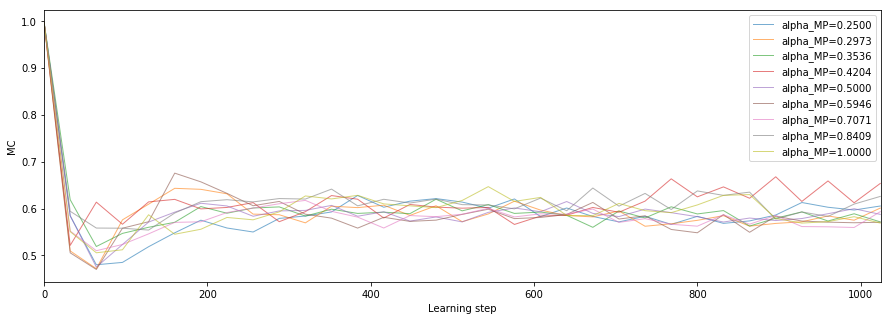

Time evolution of  cputime


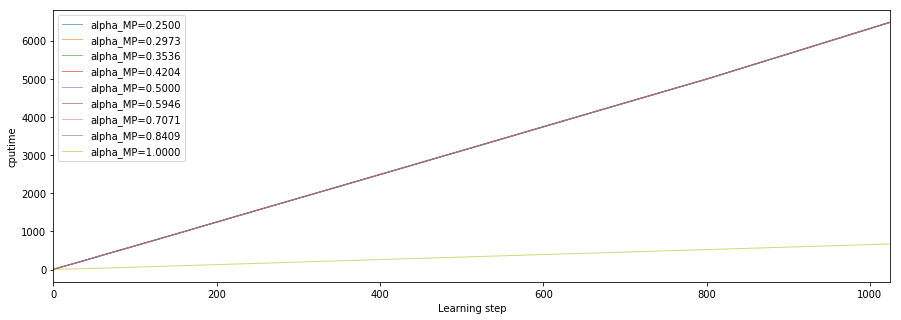

Comparison at the end of learning for  error


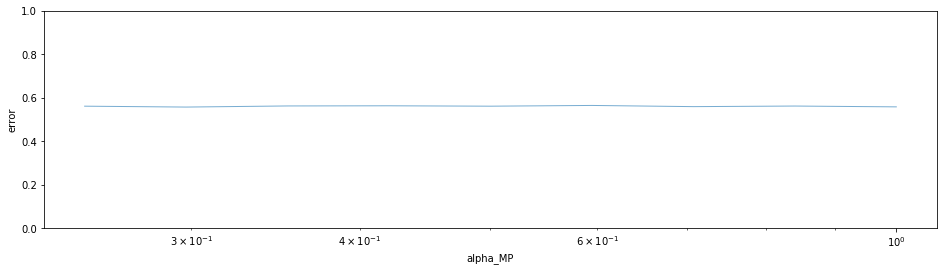

Comparison at the end of learning for  logL


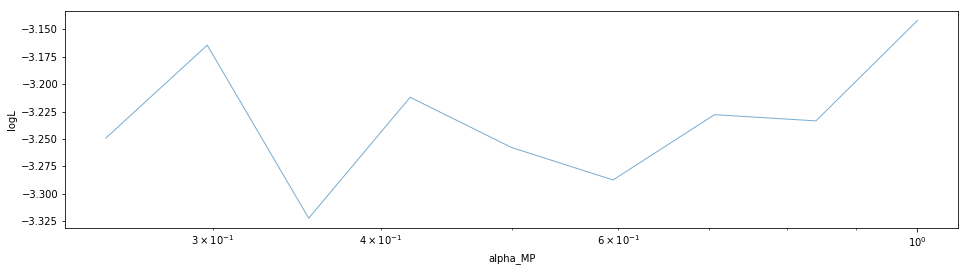

Comparison at the end of learning for  perror


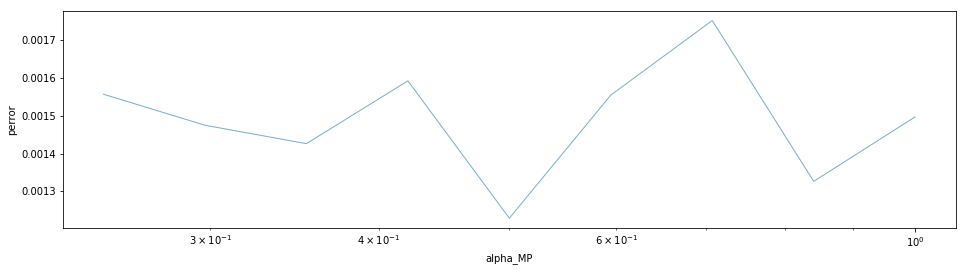

Comparison at the end of learning for  MC


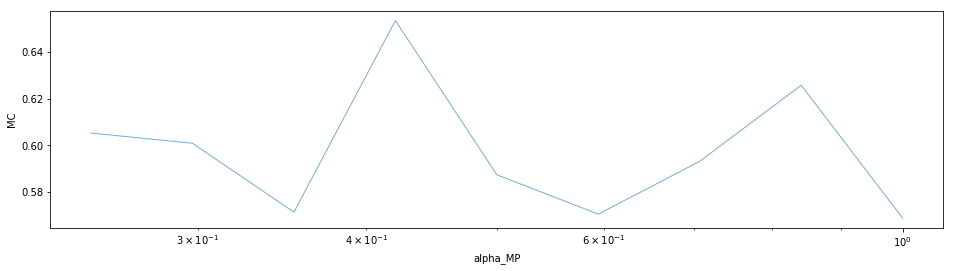

Comparison at the end of learning for  cputime


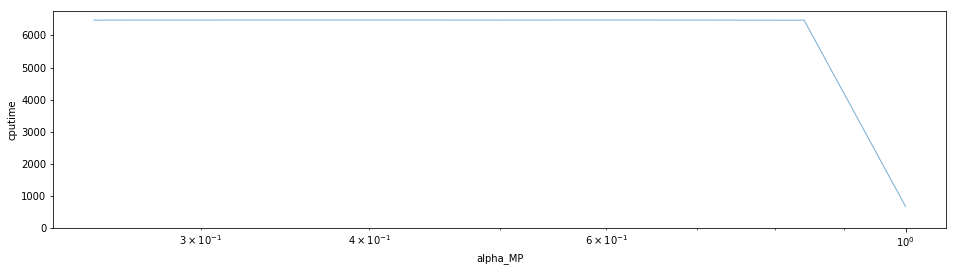

In [7]:
%run {experiments.shl.cache_dir}/{tag}.py plot

## Version used

In [8]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 7.0.1
OS Darwin 18.0.0 x86_64 i386 64bit
numpy 1.15.2
shl_scripts 20171221
Tue Oct 02 11:02:41 2018 CEST